<a href="https://colab.research.google.com/github/abrown12005/CMP_SC-4540-HW/blob/main/TestNest/Logistic_MLE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Maximum Likelihood Estimation colab has been altered from a normal distribution to a Logistic distribution.

The variable 'mu' represents the mean and 's' represents the scale parameter


In [ ]:
from scipy import stats
import numpy as np
from scipy.optimize import minimize

np.random.seed(1)

samples = 100
mu      = 0
s       = 1

#  Take random sample from the distribution of data (log dist)
sample_data = np.random.logistic(loc=mu, scale=s, size=samples)

def logistic(params):
    mean = params[0]
    sc = params[1]

    # Calculate negative log likelihood
    nll = -np.sum(stats.logistic.logpdf(sample_data, loc=mean, scale=sc))

    return nll

initParams = [1, 1]

results = minimize(logistic, initParams, method='Nelder-Mead')


print('mean*  = {:.3f} s*  = {:.3f}'.format(results.x[0],results.x[1]))
print('mean   = {:.3f} s   = {:.3f}'.format(mu, s))

mean*  = -0.088 s*  = 1.060
mean   = 0.000 s   = 1.000


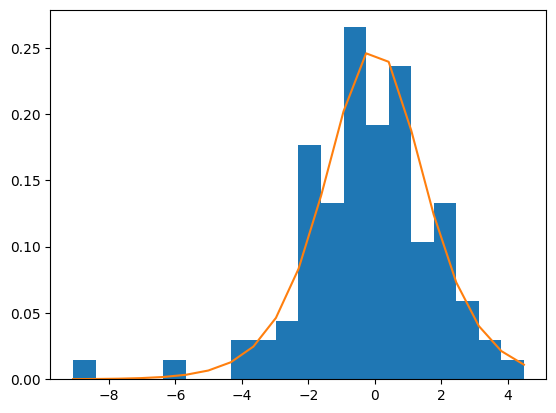

In [ ]:
import matplotlib.pyplot as plt

def log_dist(inp,mean,s):
    return  (1/(4*s))*(1/(np.cosh((inp-mean)/(2*s))**2))

x = np.arange(-10, 10, 0.1)

y = log_dist(x,mu,s)

num_bins = 20

count, bins, ignored = plt.hist(sample_data, bins=num_bins, density=True)
plt.plot(bins, (1/(4*s))*(1/(np.cosh((bins-mu)/(2*s))**2)))
plt.show()